In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [32]:
!pip install networkx

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [22]:
# Step 1: Load and clean the dataset
df = pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
# Remove duplicates
df = df.drop_duplicates()
df.shape

(302, 14)

In [25]:
# Drop rows with missing values
df = df.dropna()
df.shape

(302, 14)

In [26]:
# Step 2: Normalize numeric columns using Min-Max scaling
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [27]:
# Step 3: Define the Bayesian Network structure
model = DiscreteBayesianNetwork([
    ('age', 'fbs'),
    ('fbs', 'target'),
    ('target', 'chol'),
    ('target', 'thalach')
])

In [28]:
# Step 4: Train the model using Maximum Likelihood Estimation
model.fit(df, estimator=MaximumLikelihoodEstimator)

In [29]:
# Step 5: Inference using the trained model
inference = VariableElimination(model)

In [30]:
print("What is the probability of heart disease (target) given normalised age = 0.5?")
input_age = 0.6
valid_ages = df['age'].unique()
closest_age = min(valid_ages, key=lambda x: abs(x - input_age))

# Use the closest valid value for inference
q1 = inference.query(variables=['target'], evidence={'age': closest_age})
print(f"Q1: P(target | normalized age : {input_age} ≈ {closest_age:.4f})")
print(q1)

What is the probability of heart disease (target) given normalised age = 0.5?
Q1: P(target | normalized age : 0.6 ≈ 0.6042)
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.4593 |
+-------------+---------------+
| target(1.0) |        0.5407 |
+-------------+---------------+


In [31]:
# Example inference 2: Distribution of cholesterol (chol) given target = 1
print("\nDistribution of cholesterol given heart disease (target=1):")
q2 = inference.query(variables=['chol'], evidence={'target': 1})
print(q2)


Distribution of cholesterol given heart disease (target=1):
+----------------------------+-------------+
| chol                       |   phi(chol) |
+============================+=============+
| chol(0.0)                  |      0.0061 |
+----------------------------+-------------+
| chol(0.011415525114155278) |      0.0000 |
+----------------------------+-------------+
| chol(0.034246575342465724) |      0.0061 |
+----------------------------+-------------+
| chol(0.052511415525114125) |      0.0061 |
+----------------------------+-------------+
| chol(0.07077625570776253)  |      0.0061 |
+----------------------------+-------------+
| chol(0.0776255707762557)   |      0.0061 |
+----------------------------+-------------+
| chol(0.0867579908675799)   |      0.0000 |
+----------------------------+-------------+
| chol(0.091324200913242)    |      0.0000 |
+----------------------------+-------------+
| chol(0.09360730593607308)  |      0.0000 |
+----------------------------+---------

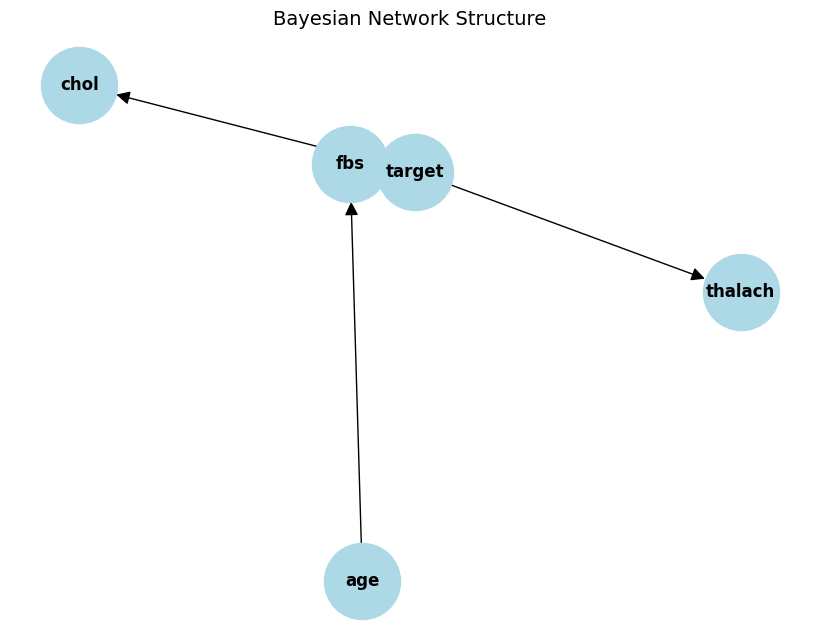

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph(model.edges())

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue',
        font_size=12, font_weight='bold', arrowsize=20)
plt.title("Bayesian Network Structure", fontsize=14)
plt.show()